# Mushroom Classification - data preparation

Use the mushroom dataset provided by UCI (https://archive.ics.uci.edu/ml/datasets/mushroom) to predict if a mushroom is edible or not using the XGBoost algorithm deployed locally.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in data

In [2]:
# Define column names
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
        'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
        'gill-color', 'stalk-shape', 'stalk-root',
        'stalk-surface-above-ring', 'stalk-surface-below-ring',
        'stalk-color-above-ring', 'stalk-color-below-ring',
        'veil-type', 'veil-color', 'ring-number', 'ring-type',
        'spore-print-color', 'population', 'habitat']

In [3]:
# Import data
df = pd.read_csv('agaricus-lepiota.data', names = columns)

## Data exploration

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Check data was read in correctly and matches description of dataset
# Number of Instances: 8124
# Number of Attributes: 22 (all nominally valued)
df.shape

(8124, 23)

In [6]:
# Class Distribution: 
# edible: 4208 (51.8%)
# poisonous: 3916 (48.2%)
# total: 8124 instances
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [7]:
# Separate diabetic and normal samples
edible = df['class'] == 'e'
poisonous = df['class'] == 'p'

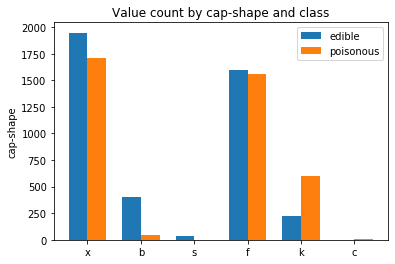

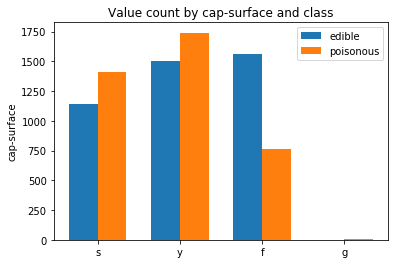

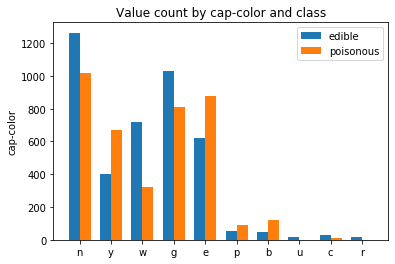

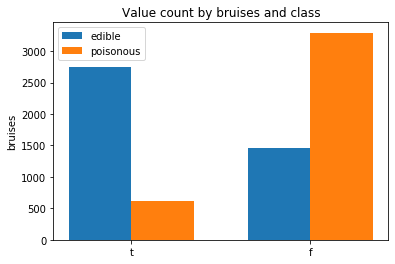

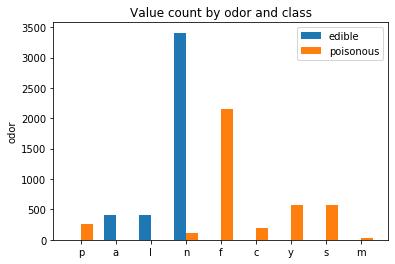

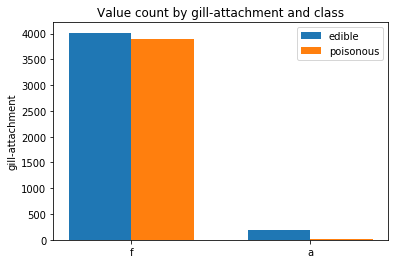

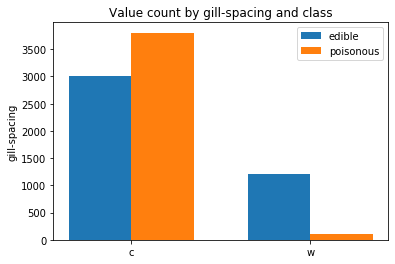

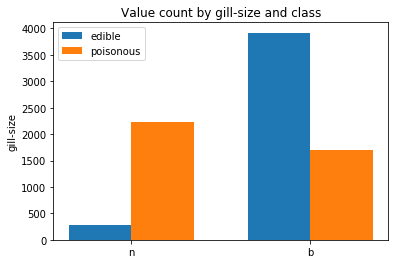

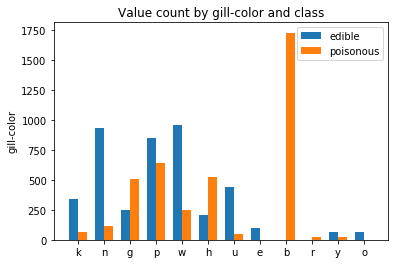

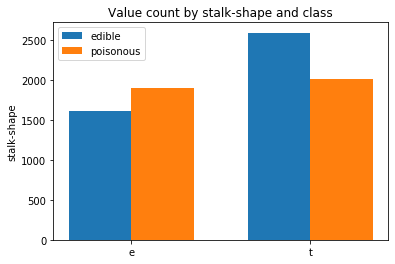

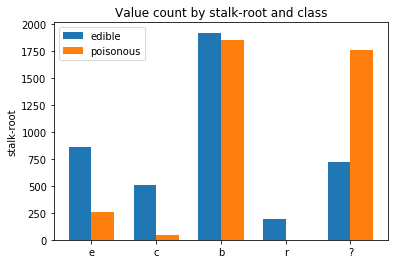

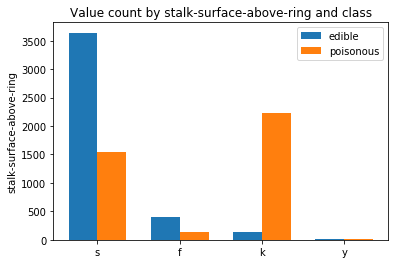

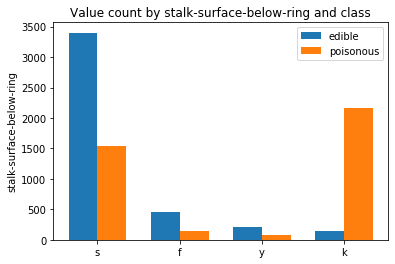

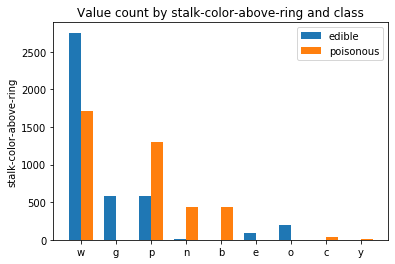

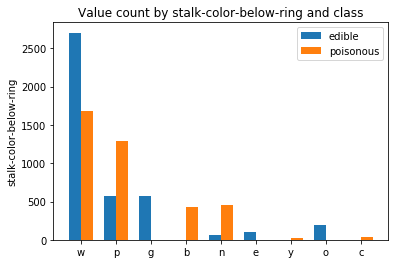

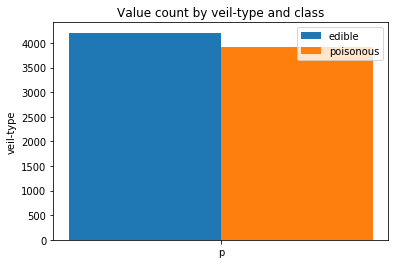

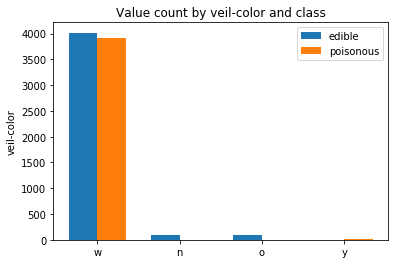

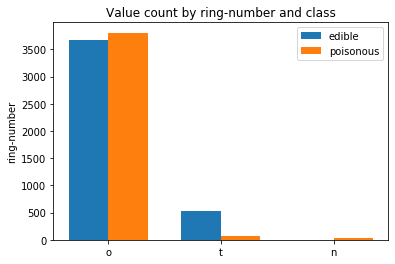

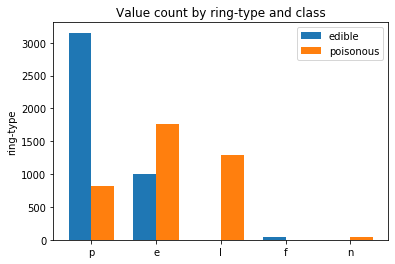

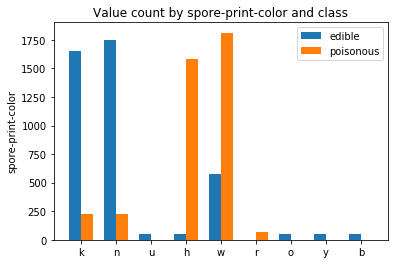

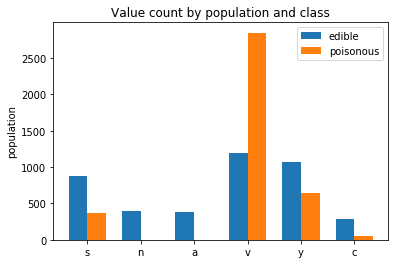

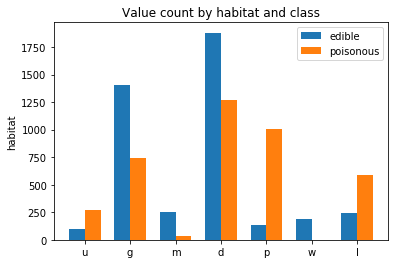

In [8]:
for attribute in ['cap-shape', 'cap-surface', 'cap-color', 'bruises',
        'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
        'gill-color', 'stalk-shape', 'stalk-root',
        'stalk-surface-above-ring', 'stalk-surface-below-ring',
        'stalk-color-above-ring', 'stalk-color-below-ring',
        'veil-type', 'veil-color', 'ring-number', 'ring-type',
        'spore-print-color', 'population', 'habitat']:
    labels = list(df[attribute].unique())
    edible_value_counts = []

    edible_value_counts = []
    poisonous_value_counts = []

    for label in labels:
        edible_count = (df[edible][attribute] == label).sum()
        edible_value_counts.append(edible_count)
        poisonous_count = (df[poisonous][attribute] == label).sum()
        poisonous_value_counts.append(poisonous_count)

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax.bar(x - width/2, edible_value_counts, width, label='edible')
    ax.bar(x + width/2, poisonous_value_counts, width, label='poisonous')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(attribute)
    ax.set_title(f"Value count by {attribute} and class")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

## Data manipulation

### Check for missing values

In [9]:
# Replace ? with NaN
df.replace('?', np.nan, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [11]:
# Look for any rows that have NA
rows_missing_values = df.isna().any(axis=1)

In [12]:
df['stalk-root'][rows_missing_values]

3984    NaN
4023    NaN
4076    NaN
4100    NaN
4104    NaN
       ... 
8119    NaN
8120    NaN
8121    NaN
8122    NaN
8123    NaN
Name: stalk-root, Length: 2480, dtype: object

### Create dummies based on nominal categorical variables

In [13]:
df = pd.get_dummies(data=df, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises',
        'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
        'gill-color', 'stalk-shape',
        'stalk-surface-above-ring', 'stalk-surface-below-ring',
        'stalk-color-above-ring', 'stalk-color-below-ring',
        'veil-type', 'veil-color', 'ring-number', 'ring-type',
        'spore-print-color', 'population', 'habitat'])

### Enocode class variable

In [14]:
mapping = {'e': 0, 'p': 1}
df['class'] = df['class'].map(mapping)

### Deal with missing values

In [15]:
# Could add more sophisticated method to fill missing values.
# However, we can get a model with 100% accuracy without the stalk-root attribute, so we can just drop it.
del df['stalk-root']

In [16]:
df.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## Create training and testing set

In [17]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.loc[l]

In [18]:
df

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
5350,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
7926,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4804,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
569,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1844,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1725,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4079,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2254,0,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [19]:
rows = df.shape[0]
train = int(.6 * rows)
validate = (rows-train)/2
test = (rows-train)/2

In [20]:
rows, train, validate, test

(8124, 4874, 1625.0, 1625.0)

In [21]:
validate_stop = int(train + validate)

In [22]:
columns = df.columns
columns

Index(['class', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=113)

In [23]:
# Write Column List
with open('mushroom_train_column_list.txt','w') as f:
    f.write(','.join(columns))

In [24]:
# Write Training Set
df.iloc[:train].to_csv('mushroom_train.csv',index=False,header=False)

In [25]:
# Write Validation Set
df.iloc[train:validate_stop].to_csv('mushroom_validation.csv',index=False,header=False)

In [26]:
# Remove class
#del df['class']
# Write Test Set
df.iloc[validate_stop:].to_csv('mushroom_test.csv',index=False,
                            header=False)